In [1]:
%pylab inline
import matplotlib

display=True

if not display:
    matplotlib.use('Agg')

import numpy as np
import math
import sys
sys.path.insert(0,'../../../../utils/python')

import readBinary as r
import utils
import matplotlib.pyplot as plt
import pandas as pd


Populating the interactive namespace from numpy and matplotlib
import failed


In [5]:

maxFiles={ 'MC':400, 'Data':4}
#maxFiles={ 'MC':200, 'Data':200}
# maxFiles={ 'MC':40, 'Data':40}
# maxFiles={ 'MC':20, 'Data':1}
maxFiles={ 'MC':2000, 'Data':10}
#utils.useCache=False

varToLoad=('R','BetaRICH','selStatus')
useCachedMapper=False
rigBins=np.linspace(7,29,20)
variables=dict()
variables['BetaRICH']={'init': [200, 0.995, 0.05], 'range': (0.99, 1.005), 'ylim':(0,200), 'widthSecondFit':1.5}

mean, std = dict(), dict()
for var in variables:
    mean[var]=dict()
    std[var]=dict()


In [6]:

def makeHistAndFit(hist,init,widthSecondFit,funcFit=None,**kwargs):
    if funcFit is None: funcFit=utils.gaussian
    n, bins = hist

    xdata, ydata = ((bins[:-1] + bins[1:])*0.5,n)
    out = utils.fit(funcFit,xdata,ydata,init)
    if len(out[0]) > 2:
        filteredData=filter(lambda x: -math.fabs(out[0][2])*widthSecondFit < x[0]-out[0][1] < math.fabs(out[0][2])*widthSecondFit,zip(xdata,ydata))
        if len(filteredData) > 0:
            x,y = zip(*filteredData )
            out = utils.fit(funcFit,x,y,out[0])
            plt.plot(x,funcFit(out[0],x),linewidth=2.0)
    else : plt.plot(xdata,funcFit(out[0],xdata),linewidth=2.0)
    return out[0]

def mapper(df):
    histo=list()
    df=df[(df.selStatus&2097151)==2097151]
    var='BetaRICH'
    for i in range(len(rigBins[:-1])):
        histo.append( np.histogram(df[(df['R']>=rigBins[i]) & (df['R']<rigBins[i+1])][var].values, range=variables[var]['range'], bins=100) )
    return histo

def reducer(histos):
    res=[]

    for j,energy in enumerate( zip(*histos) ):
        bins=energy[0][1]
        n=reduce(lambda x,y: [x[i]+y[0][i] for i in range(len(y[0]))],energy, [0 for i in range(len(energy[0][0]))])
        n = [i/float(sum(n)) for i in n]
        hist = ( n, bins)

        name=var + 'distribution - rigidity : ['+str(rigBins[j])+','+str(rigBins[j+1])+']'
        if display:
            plt.figure(name)
            plt.title(name)
            plt.hist([b for b in bins[:-1]],weights=n,bins=bins,histtype='step')
            plt.ylim((0,0.045))


        res.append( makeHistAndFit( hist, variables['BetaRICH']['init'], variables['BetaRICH']['widthSecondFit']) ) 
    return zip(*res)

loading : /afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/protons.B1034_pr.pl1.1200.qgsp_bic_ams_noSmearing/1946159363.00000001.output/
end of loading
loading : /afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/protons.B1034_pr.pl1.1200.qgsp_bic_ams_noSmearing/1946159363.05974689.output/
end of loading
loading : /afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/protons.B1034_pr.pl1.1200.qgsp_bic_ams_noSmearing/1946159364.00000001.output/
end of loading
loading : /afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/protons.B1034_pr.pl1.1200.qgsp_bic_ams_noSmearing/1946159364.05973396.output/
end of loading
loading : /afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/protons.B1034_pr.pl1.1200.qgsp_bic_ams_noSmearing/872731547.00000001.output/
end of loading
loading : /afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/protons.B1034_pr.pl1.1200.qgsp_bic_ams_noSmearing/872731548.00000001.output/
end of loading
loading : /afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/protons.B1034_pr.pl1.1200.qgsp_bic_ams_noSmea

/afs/cern.ch/user/b/bcoste/.virtualenvs/python-2.7-sql/lib/python2.7/site-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


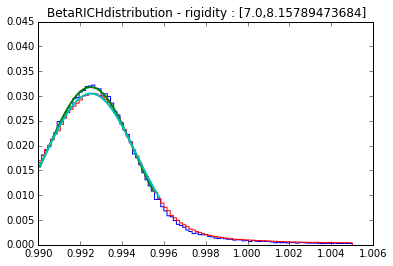

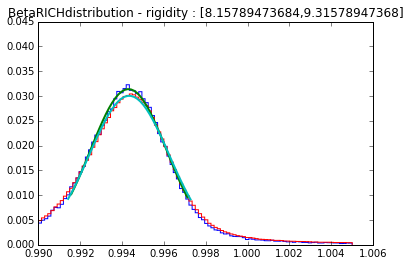

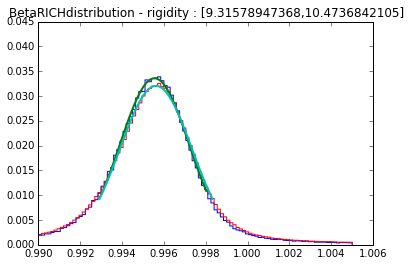

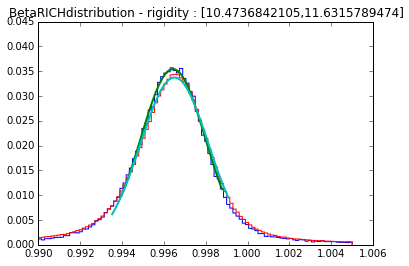

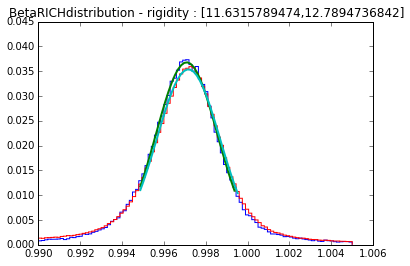

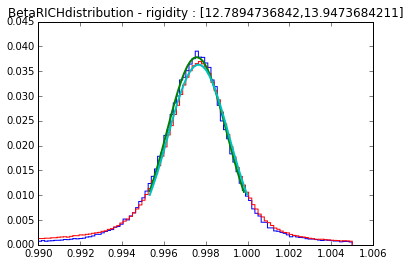

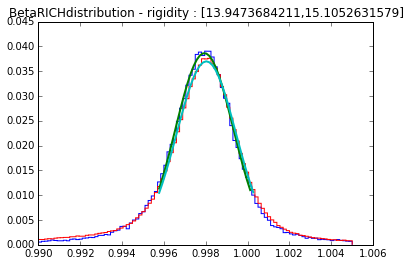

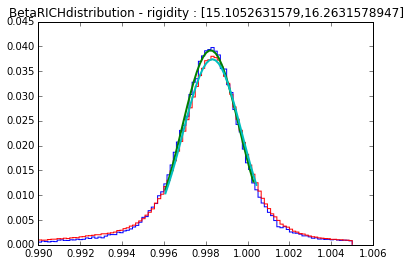

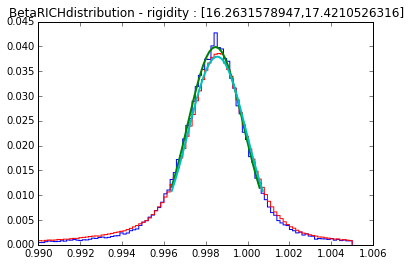

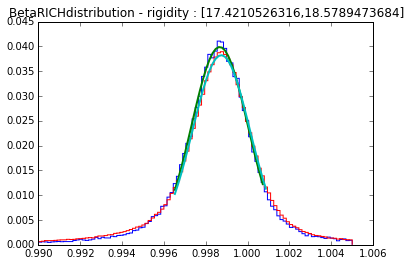

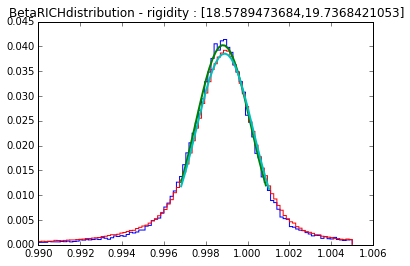

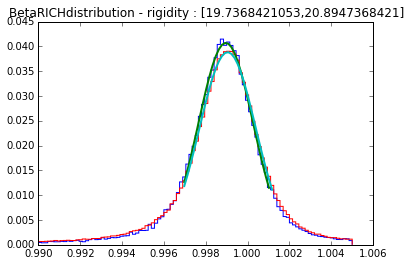

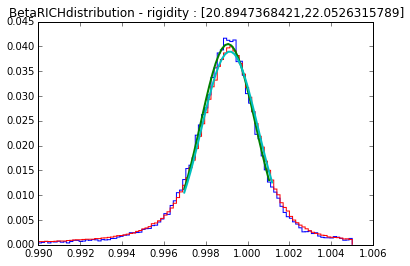

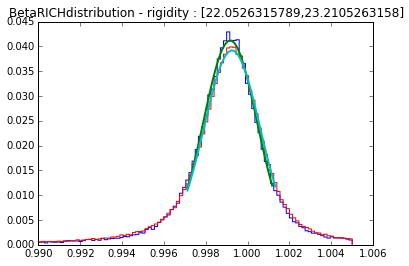

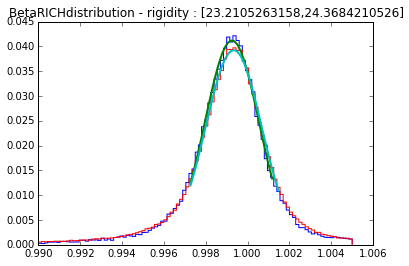

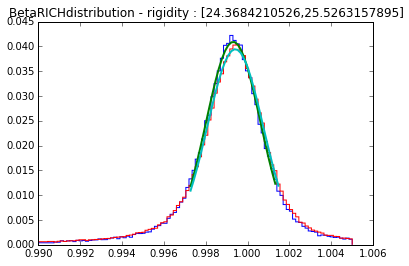

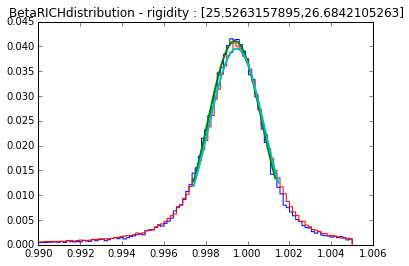

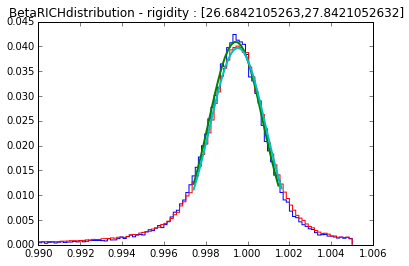

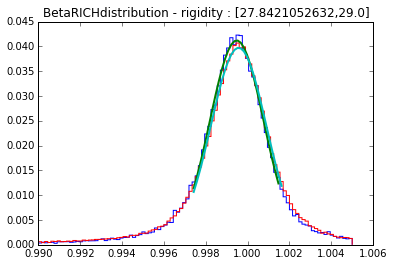

In [7]:

scale,mean['BetaRICH']['MC'],std['BetaRICH']['MC'] = r.map_reduce('/afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/protons.B1034_pr.pl1.1200.qgsp_bic_ams_noSmearing/*/', mapper, reducer, varToLoad=varToLoad, maxFiles=maxFiles['MC'],useCachedMapper=useCachedMapper)
scale,mean['BetaRICH']['Data'],std['BetaRICH']['Data'] = r.map_reduce('/afs/cern.ch/user/b/bcoste/myeos/binaryAmsData/ISS.B950_pass6_allVariables/*/', mapper, reducer, varToLoad=varToLoad, maxFiles=maxFiles['Data'],useCachedMapper=useCachedMapper)


BetaRICH
done


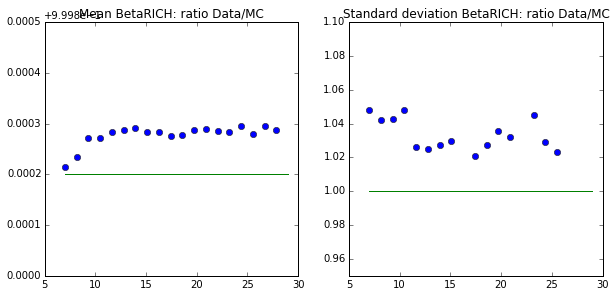

In [10]:
# plt.show()
canvasMean={
    'BetaRICH':          (0.9998,1.0003)
    }

canvasStd={
    'BetaRICH':       (0.95,1.10)
}

for var in variables:
    print var
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    ratioMean=[x/y for x,y in zip(mean[var]['Data'],mean[var]['MC'])]

    plt.title('Mean '+ var + ': ratio Data/MC')
    plt.plot(rigBins[:-1],ratioMean,'o')
    plt.plot((rigBins[0],rigBins[-1]),(1,1))
    plt.ylim(canvasMean[var])

    plt.subplot(222)
    ratioStd=[x/y for x,y in zip(std[var]['Data'],std[var]['MC'])]
    plt.title('Standard deviation '+ var + ': ratio Data/MC')
    plt.plot(rigBins[:-1],ratioStd,'o')
    plt.plot((rigBins[0],rigBins[-1]),(1,1))
    plt.ylim(canvasStd[var])
print 'done'